<a href="https://colab.research.google.com/github/golesuman/66daysofdata/blob/main/populationanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('world_population.csv')
df.head(3)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    int64  
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    int64  
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    float64
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
 10  World Share        201 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 17.4+ KB


In [10]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.010000e+02,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,194.000000,201.000000
mean,3.877661e+07,1.200299,4.046234e+05,361.711443,6.450903e+05,-5.442786,2.692040,30.621891,59.634021,0.497463
std,1.454245e+08,1.091574,1.210610e+06,1710.321831,1.809408e+06,123292.057588,1.264253,9.119557,22.226695,1.865678
min,9.792900e+04,-2.470000,-3.838400e+05,2.000000,3.000000e+01,-653249.000000,1.100000,15.000000,13.000000,0.000000
25%,1.886198e+06,0.420000,4.103000e+03,34.000000,2.164000e+04,-10047.000000,1.700000,22.000000,43.000000,0.020000
50%,8.654622e+06,1.080000,6.040300e+04,89.000000,1.085600e+05,-960.000000,2.300000,30.000000,60.000000,0.110000
75%,2.769102e+07,1.960000,3.602040e+05,228.000000,4.988000e+05,9741.000000,3.600000,39.000000,78.750000,0.360000
max,1.439324e+09,3.840000,1.358663e+07,21645.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [11]:
df.isna().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          7
World Share          0
dtype: int64

In [12]:
df.dropna(inplace=True)

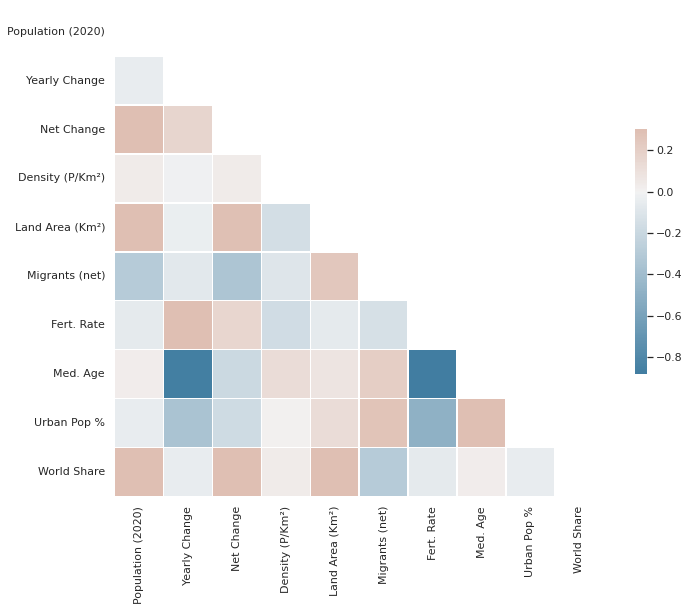

In [34]:
#analysing the population by country
sns.set_theme(style='whitegrid')
corr=df.iloc[:,1:].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(235,25,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,
            linewidths=.5,cbar_kws={'shrink':.5})


In [29]:
df_copy=df.copy()
df_copy.sort_values(by='Population (2020)',ascending=False,inplace=True)
df_copy.head(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
116,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0,1.65


In [31]:
top_ten=df_copy.head(10)
top_ten

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
116,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0,1.65


In [40]:
df_copy.tail(10)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
72,Guam,168775,0.89,1481,313,540,-506,2.3,31,95.0,0.0
43,Curaçao,164093,0.41,669,370,444,515,1.8,42,89.0,0.0
94,Kiribati,119449,1.57,1843,147,810,-800,3.6,23,57.0,0.0
70,Grenada,112523,0.46,520,331,340,-200,2.1,32,35.0,0.0
168,St. Vincent & Grenadines,110940,0.32,351,284,390,-200,1.9,33,53.0,0.0
7,Aruba,106766,0.43,452,593,180,201,1.9,41,44.0,0.0
181,Tonga,105695,1.15,1201,147,720,-800,3.6,22,24.0,0.0
186,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96.0,0.0
156,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56.0,0.0
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.0


In [41]:
least_ten=df_copy.tail(10)

In [56]:

def PlotTopTen(col):
  plt.figure(figsize=(15,8))
  plt.title(f'Top 10 Countries with highest {col}')
  sns.barplot(x='Country/Other',y=col,data=top_ten)


def leastTen(col):
  plt.figure(figsize=(15,8))
  plt.title(f'Top 10 Coutries with lowest {col}')
  sns.barplot(x='Country/Other',y=col,data=least_ten)




In [57]:
numeric_features=[feature for feature in df.columns if df[feature].values.dtype!='O']

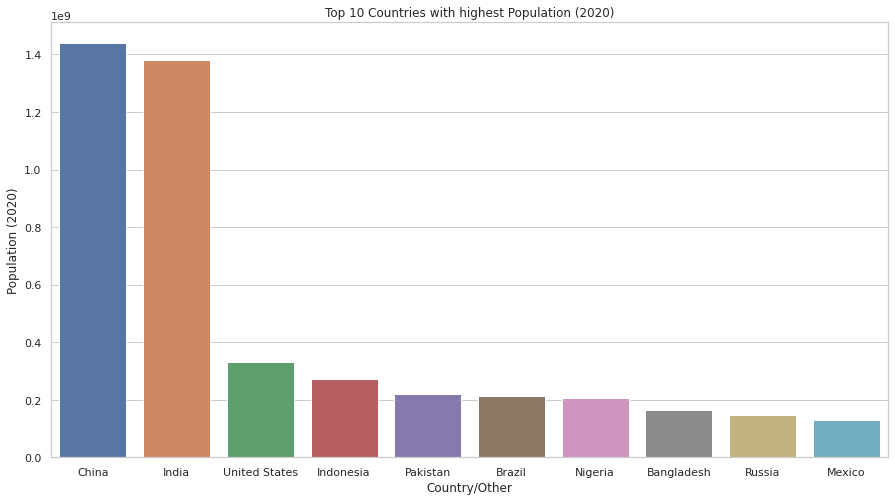

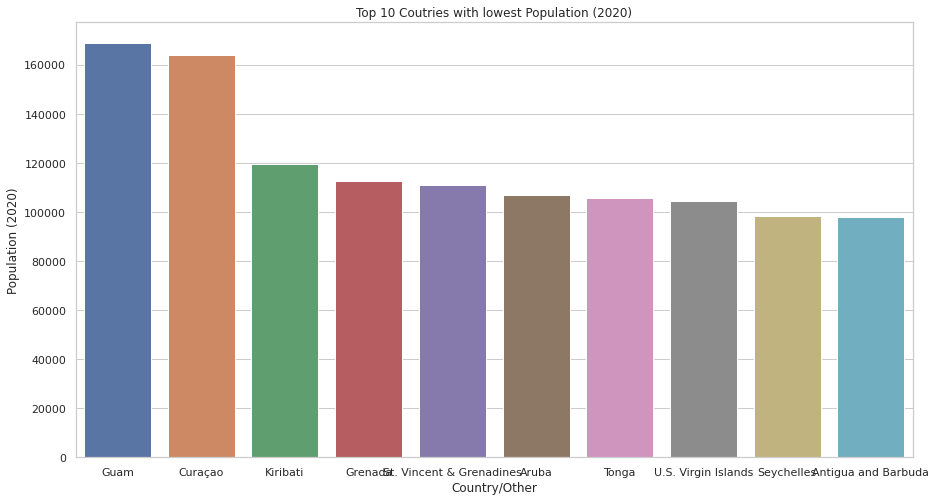

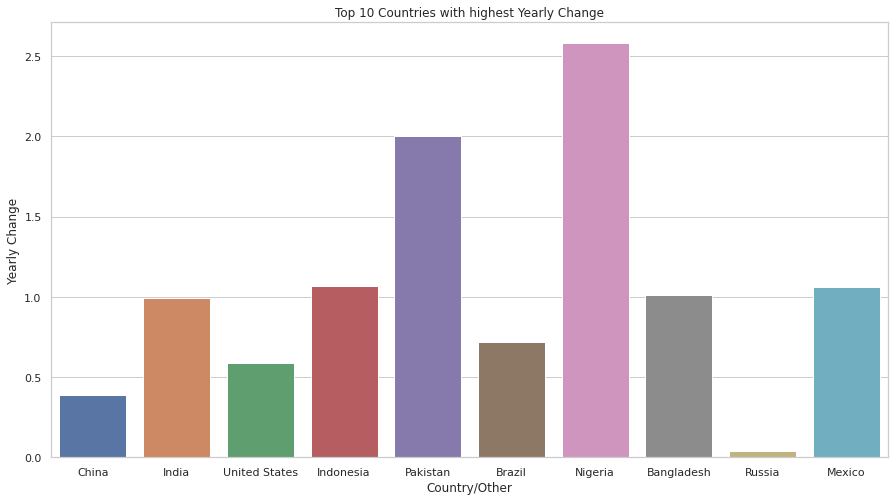

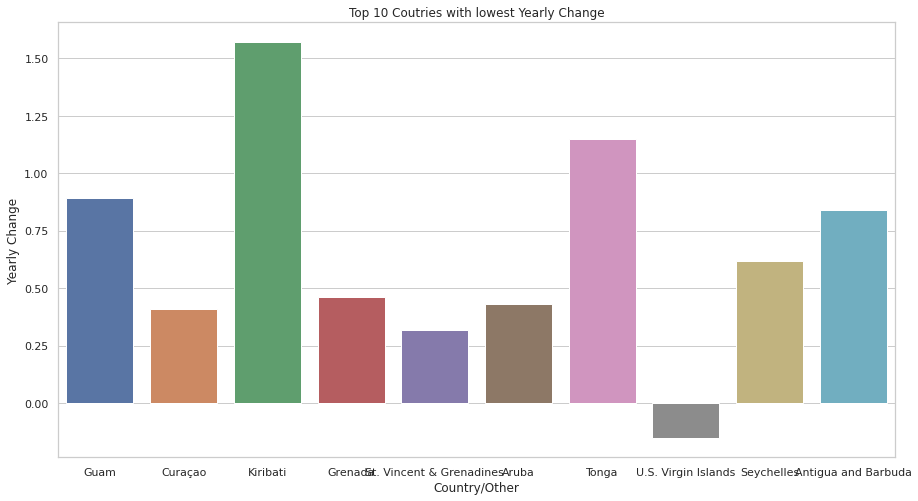

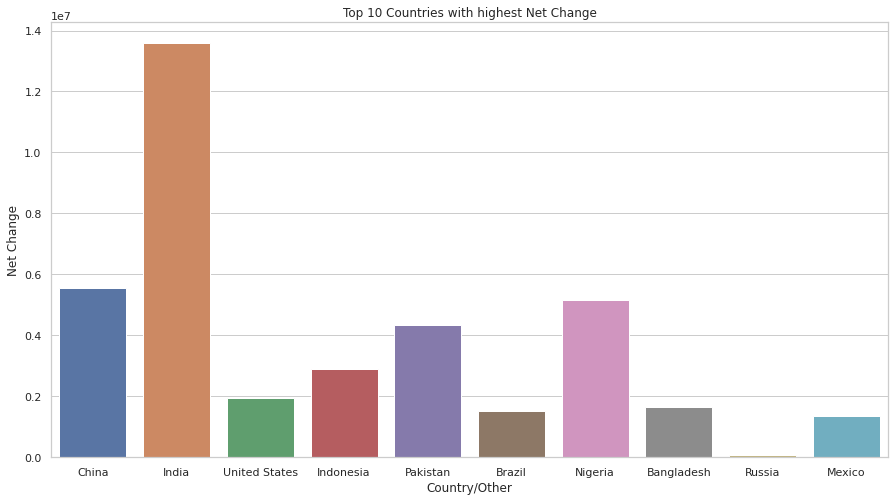

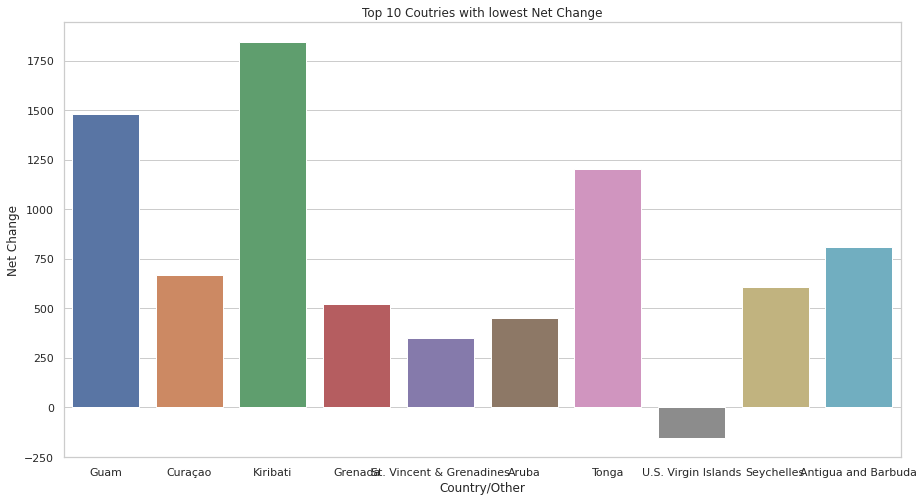

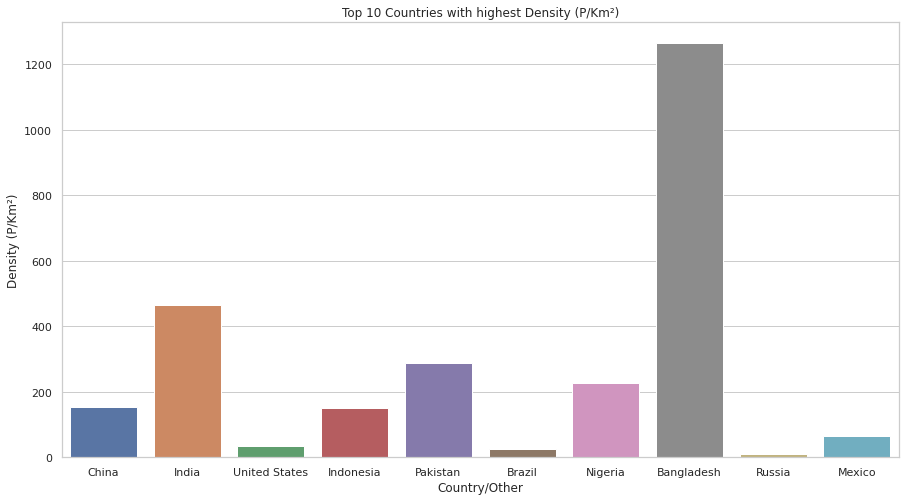

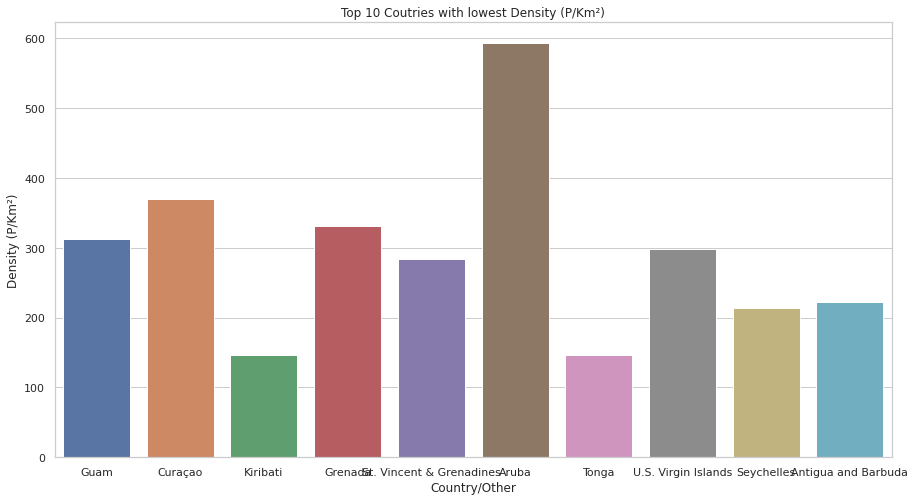

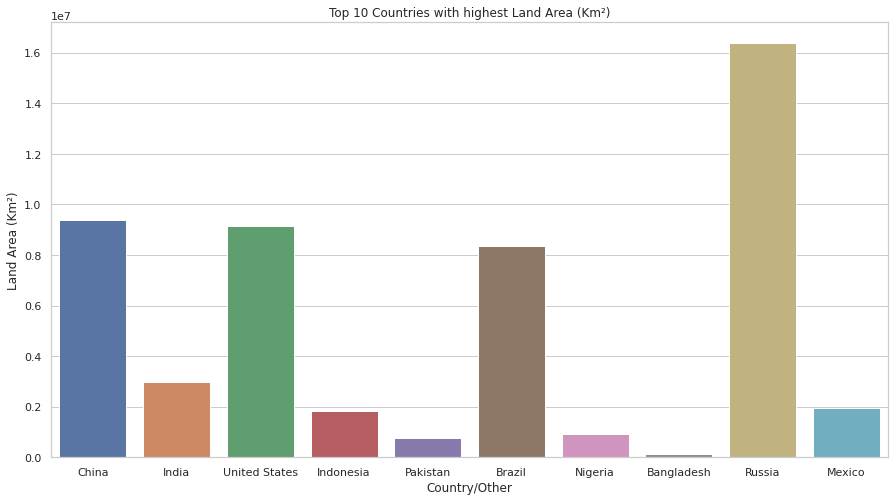

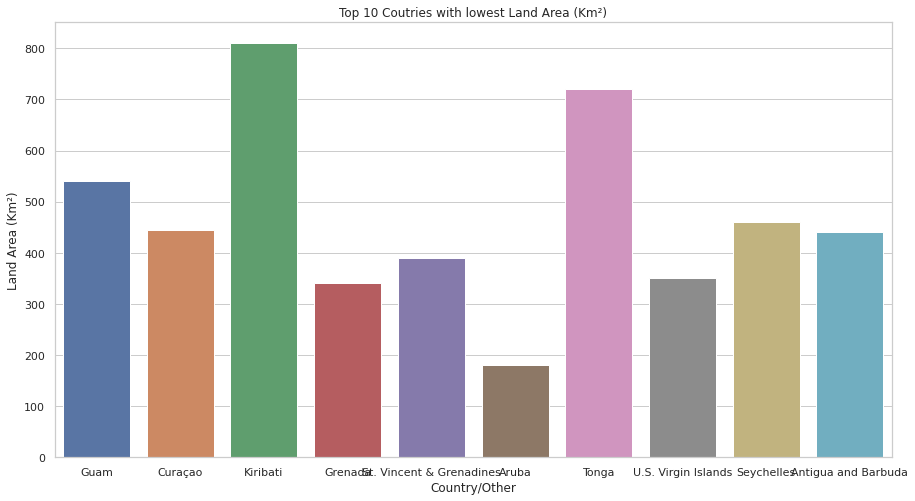

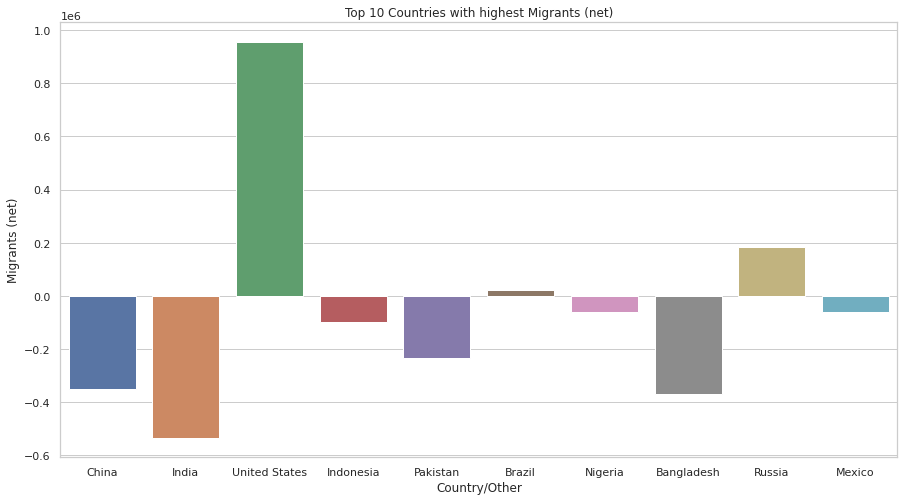

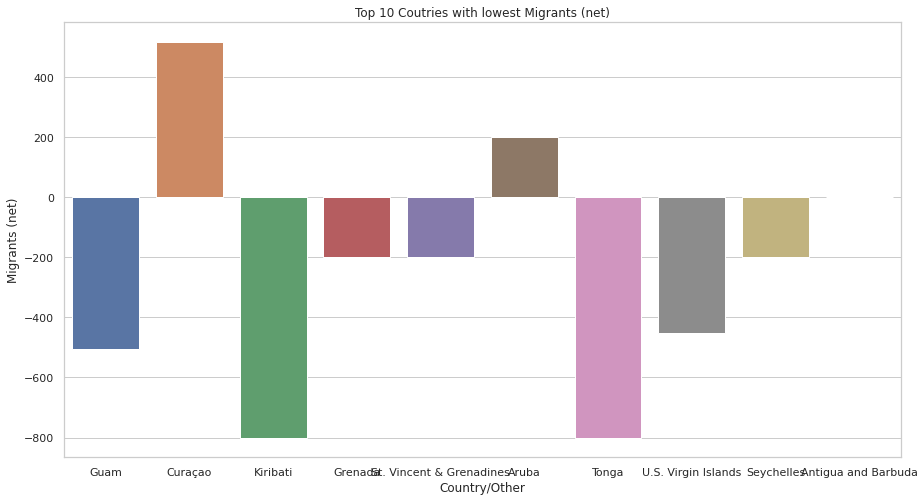

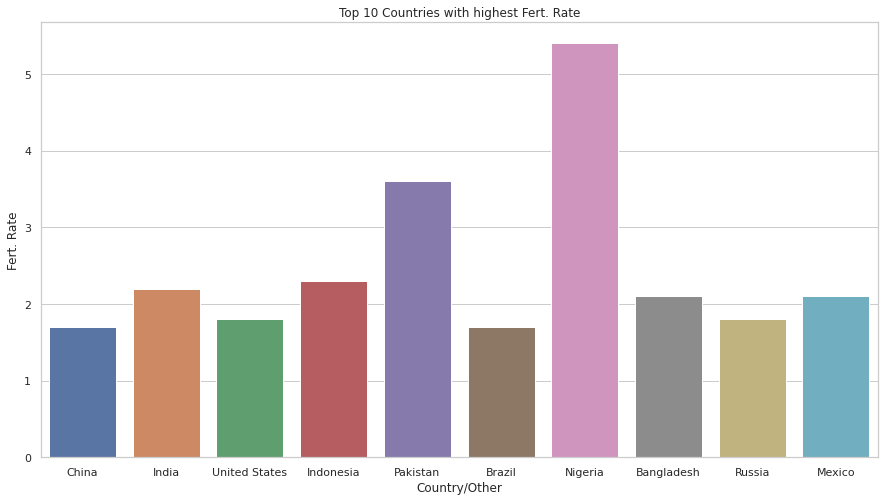

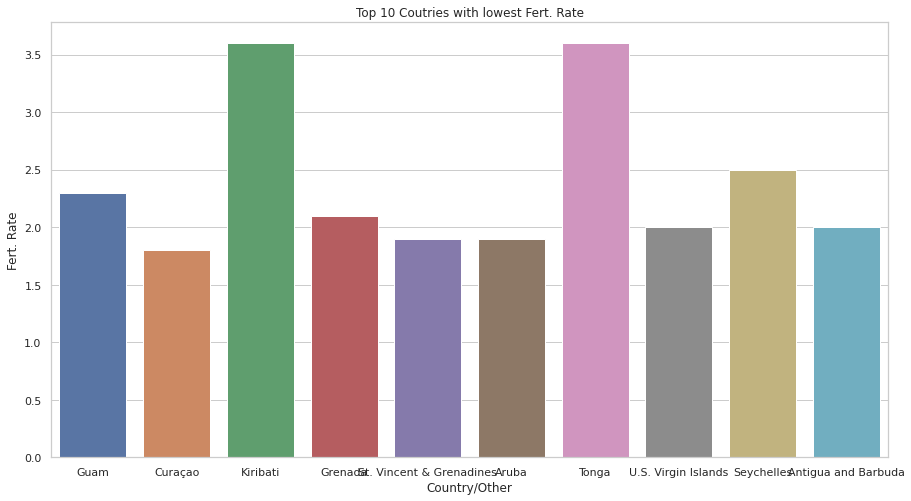

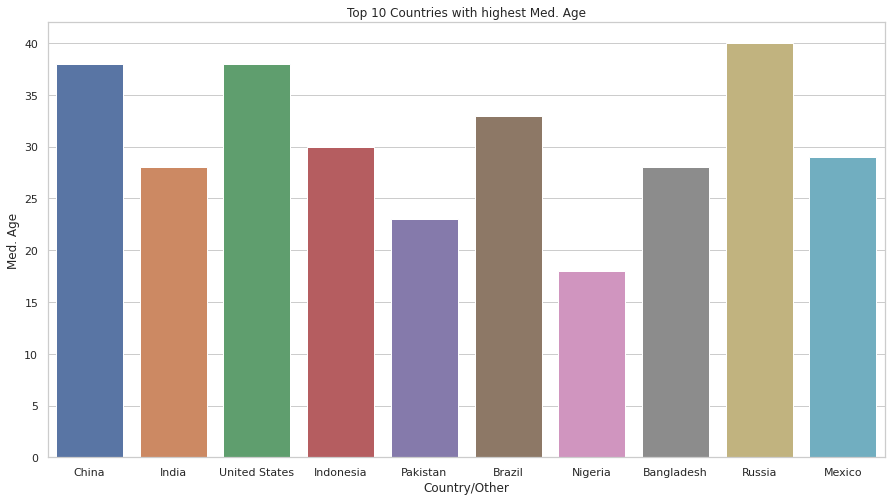

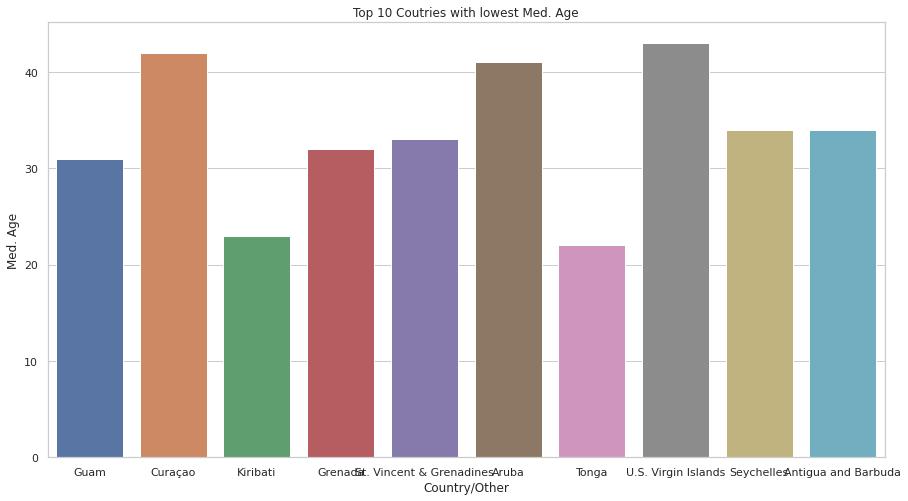

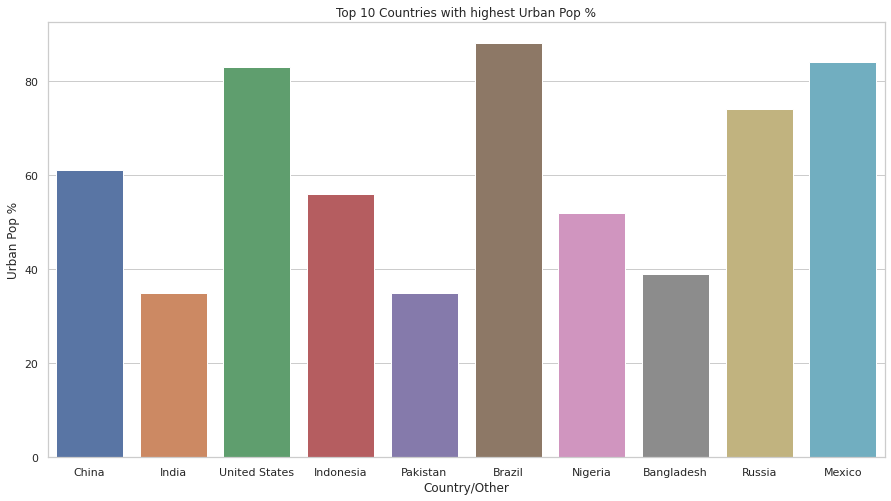

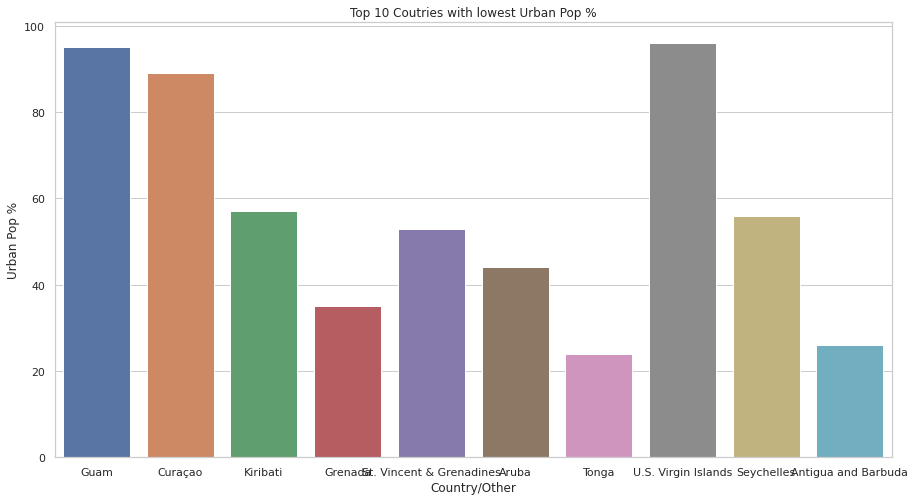

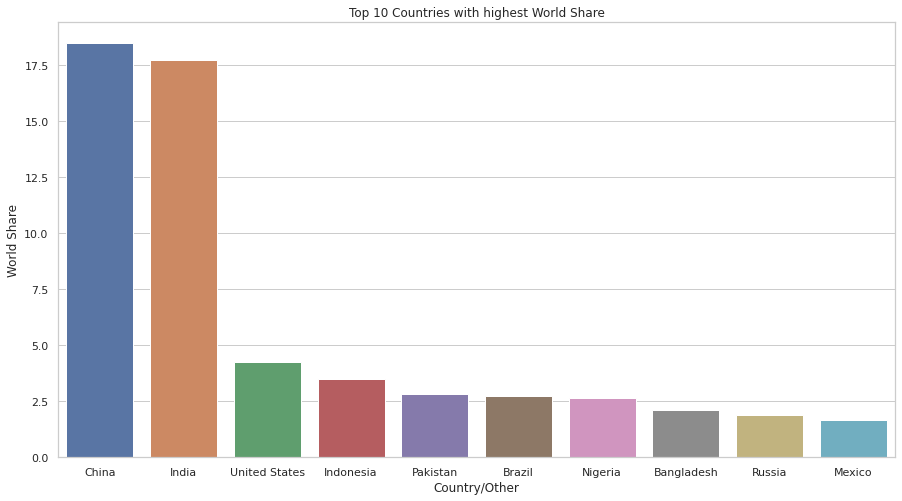

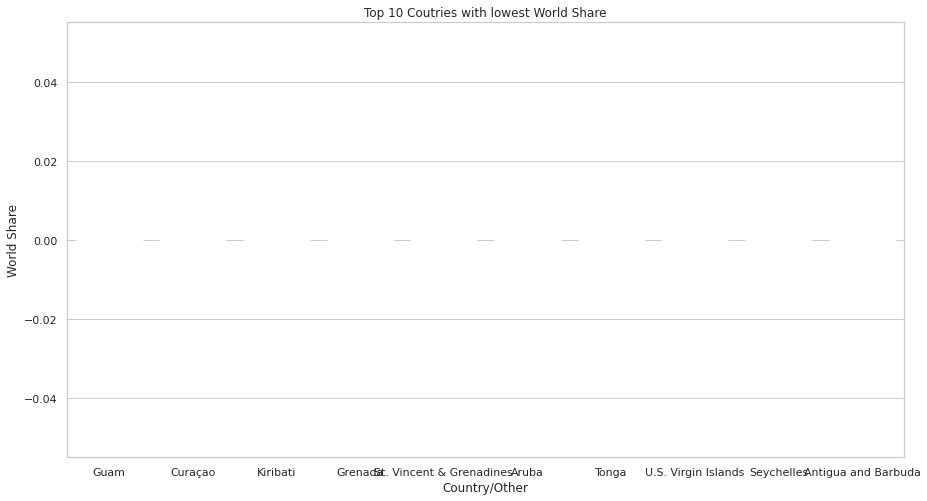

In [58]:
for feature in numeric_features:
  PlotTopTen(feature)
  leastTen(feature)
  plt.show()